In [97]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import SelectKBest, f_regression
from scipy.stats import f
import matplotlib.pyplot as plt

In [98]:
df = pd.read_csv('/Users/PJizzle/Code/Data Mining Project/vgsales.csv')

In [99]:
df = df.drop('NA_Sales', axis=1)

In [100]:
df = df.drop('EU_Sales', axis=1)

In [101]:
df = df.drop('JP_Sales', axis=1)

In [102]:
df

,Year,Genre,Global_Sales,Rank
0,2006.0,Sports,82.74,1
1,1985.0,Platform,40.24,2
2,2008.0,Racing,35.82,3
3,2009.0,Sports,33.00,4
4,1996.0,Role-Playing,31.37,5
5,1989.0,Puzzle,30.26,6
6,2006.0,Platform,30.01,7
7,2006.0,Misc,29.02,8
8,2009.0,Platform,28.62,9
9,1984.0,Shooter,28.31,10


In [103]:
classes = pd.Series(df['Genre'].unique(), name='Genre')

In [104]:
classes

0           Sports
1         Platform
2           Racing
3     Role-Playing
4           Puzzle
5             Misc
6          Shooter
7       Simulation
8           Action
9         Fighting
10       Adventure
11        Strategy
Name: Genre, dtype: object

In [105]:
classes=classes.to_frame()

In [106]:
type(classes)

pandas.core.frame.DataFrame

In [107]:
classes['Sports'] = (classes['Genre'] == 'Sports') + 0
classes['Platform'] = (classes['Genre'] == 'Platform') + 0
classes['Racing'] = (classes['Genre'] == 'Racing') + 0
classes['Role-Playing'] = (classes['Genre'] == 'Role-Playing') + 0
classes['Puzzle'] = (classes['Genre'] == 'Puzzle') + 0
classes['Misc'] = (classes['Genre'] == 'Misc') + 0
classes['Shooter'] = (classes['Genre'] == 'Shooter') + 0
classes['Simulation'] = (classes['Genre'] == 'Simulation') + 0
classes['Action'] = (classes['Genre'] == 'Action') + 0
classes['Fighting'] = (classes['Genre'] == 'Fighting') + 0
classes['Adventure'] = (classes['Genre'] == 'Adventure') + 0
classes['Strategy'] = (classes['Genre'] == 'Strategy') + 0

In [108]:
df = df.dropna()

In [109]:
df.isnull().values.any()

False

In [110]:
df2 = pd.merge(df, classes)

In [111]:
df2
len(df2)

16327

In [112]:
df_fighting = (df2['Year'] == 2015) & (df2['Genre'] == 'Adventure')
fighting2015 = df2[df_fighting]
type(fighting2015)

pandas.core.frame.DataFrame

In [113]:
fighting2015 = fighting2015.reset_index()


In [114]:
fighting2015.index = fighting2015.index + 1
fighting2015 = fighting2015.reset_index()
fighting2015 = fighting2015.drop('index', axis=1)
fighting2015.head()

,level_0,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
0,1,2015.0,Adventure,1.64,1124,0,0,0,0,0,0,0,0,0,0,1,0
1,2,2015.0,Adventure,1.30,1526,0,0,0,0,0,0,0,0,0,0,1,0
2,3,2015.0,Adventure,0.91,2287,0,0,0,0,0,0,0,0,0,0,1,0
3,4,2015.0,Adventure,0.69,2952,0,0,0,0,0,0,0,0,0,0,1,0
4,5,2015.0,Adventure,0.67,3037,0,0,0,0,0,0,0,0,0,0,1,0


In [115]:
fighting2015["Global_Sales"].mean()

0.14870370370370362

In [116]:
X = fighting2015[['level_0']]
X.shape

(54, 1)

In [117]:
df_NoYear = (df2['Year'] < 2015) & (df2['Year'] > 2003) & (df2['Genre'] == 'Adventure')
df_New = df2[df_NoYear]
type(df_New)
df_New

,Year,Genre,Global_Sales,Rank,Sports,Platform,Racing,Role-Playing,Puzzle,Misc,Shooter,Simulation,Action,Fighting,Adventure,Strategy
14381,2007.0,Adventure,5.55,159,0,0,0,0,0,0,0,0,0,0,1,0
14382,2007.0,Adventure,4.83,219,0,0,0,0,0,0,0,0,0,0,1,0
14385,2011.0,Adventure,3.23,418,0,0,0,0,0,0,0,0,0,0,1,0
14386,2008.0,Adventure,3.16,435,0,0,0,0,0,0,0,0,0,0,1,0
14387,2010.0,Adventure,3.12,448,0,0,0,0,0,0,0,0,0,0,1,0
14389,2011.0,Adventure,2.72,550,0,0,0,0,0,0,0,0,0,0,1,0
14396,2013.0,Adventure,1.79,971,0,0,0,0,0,0,0,0,0,0,1,0
14401,2008.0,Adventure,1.54,1216,0,0,0,0,0,0,0,0,0,0,1,0
14402,2008.0,Adventure,1.49,1272,0,0,0,0,0,0,0,0,0,0,1,0
14403,2006.0,Adventure,1.48,1278,0,0,0,0,0,0,0,0,0,0,1,0


In [118]:
y = fighting2015['Global_Sales']

In [119]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(X,y)
x2_train, x2_test, y2_train, y2_test = sklearn.model_selection.train_test_split(X,y)

In [120]:
reg = linear_model.LinearRegression()
reg2 = linear_model.LinearRegression()

In [121]:
reg.fit(np.log(1+x_train), np.log(y_train))
reg2.fit(np.log(1+x2_train), np.log(y2_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [122]:
y_pred = np.exp(reg.predict(np.log(1+x_test)))
y2_pred = np.exp(reg2.predict(np.log(1+x2_test)))

In [123]:
print("variance score: %.2f" % r2_score(y2_test, y2_pred))

variance score: 0.95


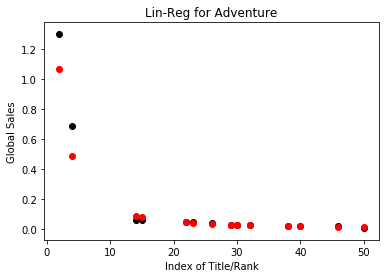

In [124]:
plt.scatter(x2_test, y2_test,  color='black')
plt.plot(x2_test, y2_pred, 'o', color='red', linewidth=2)
plt.xlabel('Index of Title/Rank')
plt.ylabel('Global Sales')
plt.title('Lin-Reg for Adventure')
plt.show()

In [125]:
reg2.coef_

array([-1.53715255])

In [126]:
reg2.intercept_

1.7572445011159665

In [127]:
y2_pred.sort()
y2_pred

array([ 0.013752  ,  0.01559165,  0.01923387,  0.02077077,  0.02685184,
        0.02956046,  0.03108858,  0.03655419,  0.0438093 ,  0.04677116,
        0.08170441,  0.09022563,  0.48835773,  1.07091114])

In [128]:
y2_test.sort_values(ascending=True)

49    0.01
37    0.02
45    0.02
39    0.02
29    0.03
28    0.03
31    0.03
25    0.04
22    0.05
21    0.05
14    0.06
13    0.06
3     0.69
1     1.30
Name: Global_Sales, dtype: float64